各年度の衆議院選挙の年代別の投票率の推移から，世代別の投票率の推移を推計する．

In [6]:
#元データ

year = [1967, 1969, 1972, 1975, 1979, 1980, 1983, 1986, 1990, 1993, 1996, 2000, 2003, 2005, 2009, 2012, 2014, 2017]

VoteRateData = {'18<=' : [None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, 40.49],\
                '20<=' : [66.69, 59.61, 61.89, 63.50, 57.83, 63.13, 54.07, 56.86, 57.76, 47.46, 36.42, 38.35, 35.62, 46.20, 49.45, 37.89, 32.58, 33.85],\
                '30<=' : [77.88, 71.19, 75.48, 77.41, 71.06, 75.92, 68.25, 72.15, 75.97, 68.46, 57.49, 56.82, 50.72, 59.79, 63.87, 50.10, 42.09, 44.75],\
                '40<=' : [82.07, 78.33, 81.84, 82.29, 77.82, 81.88, 75.43, 77.99, 81.44, 74.48, 65.46, 68.13, 64.72, 71.94, 72.63, 59.38, 49.98, 53.52],\
                '50<=' : [82.68, 80.23, 83.38, 84.57, 80.82, 85.23, 80.51, 82.74, 84.85, 79.34, 70.61, 71.98, 70.01, 77.86, 79.69, 68.02, 60.07, 63.32],\
                '60<=' : [77.08, 77.70, 82.34, 84.13, 80.97, 84.84, 82.43, 85.66, 87.21, 83.38, 77.25, 79.23, 77.89, 83.08, 84.15, 74.93, 68.28, 72.04],\
                '70<=' : [56.83, 62.52, 68.01, 71.35, 67.72, 69.66, 68.41, 72.36, 73.21, 71.61, 66.88, 69.28, 67.78, 69.48, 71.06, 63.30, 59.46, 60.94],\
                'Total' : [73.99, 68.51, 71.76, 73.45, 68.01, 74.57, 67.94, 71.40, 73.31, 67.26, 59.65, 62.49, 59.86, 67.51, 69.28, 59.32, 52.66, 53.68]}

import pandas as pd

df = pd.DataFrame(VoteRateData, index = year)
df

,18<=,20<=,30<=,40<=,50<=,60<=,70<=,Total
1967,NaN,66.69,77.88,82.07,82.68,77.08,56.83,73.99
1969,NaN,59.61,71.19,78.33,80.23,77.70,62.52,68.51
1972,NaN,61.89,75.48,81.84,83.38,82.34,68.01,71.76
1975,NaN,63.50,77.41,82.29,84.57,84.13,71.35,73.45
1979,NaN,57.83,71.06,77.82,80.82,80.97,67.72,68.01
1980,NaN,63.13,75.92,81.88,85.23,84.84,69.66,74.57
1983,NaN,54.07,68.25,75.43,80.51,82.43,68.41,67.94
1986,NaN,56.86,72.15,77.99,82.74,85.66,72.36,71.40
1990,NaN,57.76,75.97,81.44,84.85,87.21,73.21,73.31
1993,NaN,47.46,68.46,74.48,79.34,83.38,71.61,67.26


元データの可視化

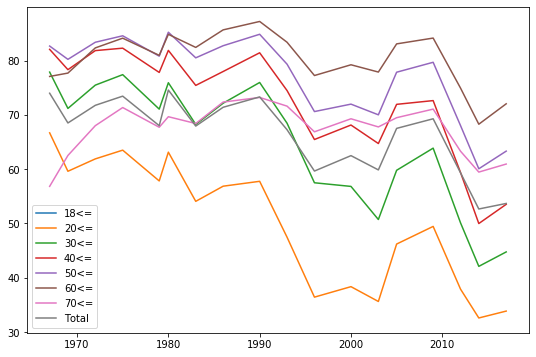

In [7]:
import seaborn as sns

df.plot(figsize=(9, 6))

2017年度における各年代の人々の以前の投票率を追跡調査する．
2017時点で70歳以上の人々は，1967年に20歳以上である．同様に2017年における60歳代の人々は1979年，50歳代は1990年，40歳代は2000年，30歳代は2009年時に20歳代であると推定できる．
そこで，世代別の投票率の推移の推計を行う．

In [8]:
df['Elasped_year'] = [0] + [df.index.values[i] - df.index.values[i - 1] for i in range(1, len(df.index))]
df['Elasped_year70'] = [0] + [df.index.values[i] - df.index.values[0] for i in range(1, len(df.index))]
df['Elasped_year60'] = [0] * 3 + [df.index.values[i] - df.index.values[3] for i in range(3, len(df.index))]
df['Elasped_year50'] = [0] * 7 + [df.index.values[i] - df.index.values[7] for i in range(7, len(df.index))]
df['Elasped_year40'] = [0] * 10 + [df.index.values[i] - df.index.values[10] for i in range(10, len(df.index))]
df['Elasped_year30'] = [0] * 13 + [df.index.values[i] - df.index.values[13] for i in range(13, len(df.index))]
df

,18<=,20<=,30<=,40<=,50<=,60<=,70<=,Total,Elasped_year,Elasped_year70,Elasped_year60,Elasped_year50,Elasped_year40,Elasped_year30
1967,NaN,66.69,77.88,82.07,82.68,77.08,56.83,73.99,0,0,0,0,0,0
1969,NaN,59.61,71.19,78.33,80.23,77.70,62.52,68.51,2,2,0,0,0,0
1972,NaN,61.89,75.48,81.84,83.38,82.34,68.01,71.76,3,5,0,0,0,0
1975,NaN,63.50,77.41,82.29,84.57,84.13,71.35,73.45,3,8,0,0,0,0
1979,NaN,57.83,71.06,77.82,80.82,80.97,67.72,68.01,4,12,4,0,0,0
1980,NaN,63.13,75.92,81.88,85.23,84.84,69.66,74.57,1,13,5,0,0,0
1983,NaN,54.07,68.25,75.43,80.51,82.43,68.41,67.94,3,16,8,0,0,0
1986,NaN,56.86,72.15,77.99,82.74,85.66,72.36,71.40,3,19,11,0,0,0
1990,NaN,57.76,75.97,81.44,84.85,87.21,73.21,73.31,4,23,15,4,0,0
1993,NaN,47.46,68.46,74.48,79.34,83.38,71.61,67.26,3,26,18,7,0,0


In [9]:
begin_index =  {'70':0, '60':3, '50':7, '40':10, '30':13}
begin_index

{'70': 0, '60': 3, '50': 7, '40': 10, '30': 13}

ある年のある世代の$x$%が$X$歳代で，$100-x$%が$X\pm 10$歳代とする．

例えば，1969年の衆議院選挙のときは1967年の20歳代は，80%が20歳代で20%が30歳代である．

$V(X)$は，ある年の$X$歳代の投票率とする．このとき世代の投票率を次のように推計した．

$x V(X) \times 0.01 + (100 - x)V(X\pm 10)\times 0.01$

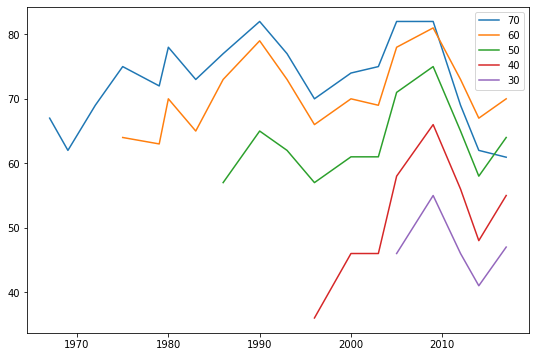

In [199]:
tmp_list = {}

for nendai, b in begin_index.items():
    
    vote_rates = [None] * b
    index = []

    for i in range(b, len(df)):
        ey0 = df.iloc[i]['Elasped_year' + nendai]
        rate = 1 - abs(20 + ey0 - round(20 + ey0, -1)) * 0.1
        sgn = (20 + ey0 - round(20 + ey0, -1) < 0) * -2 + 1
        col0 = str(int(round(20 + ey0, -1))) + '<='
        col1 = str(int(round(20 + ey0, -1))  + 10 * sgn) + '<='
#         print(str(int(20 + ey0)) + '<=', col0, rate, col1, round(1 - rate, 1), sgn)

        if col1 != '80<=':
            vote_rate = round(df.iloc[i][col0] * rate + df.iloc[i][col1] * (1 - rate))
#             print(vote_rate)
        else:
            vote_rate = df.iloc[i][col0]
#             print(vote_rate)
        
        vote_rates.append(vote_rate)
    
    tmp_list.update({nendai:vote_rates})

pd.DataFrame(tmp_list, index = df.index).plot(figsize=(9, 6))